![](https://drive.google.com/uc?id=1AvvYucoOSKprqvF2aeufFvTl35tLl3Hh)

# **VT2: BioViz: Python libraries for Machine Learning: Scikit-learn, Pandas, NumPy, TensorFlow/Keras. Building models using real-world biological data.**

**32nd Conference on Intelligent Systems for Molecular Biology (ISMB)**

Venue: Hybrid (Virtual/Montreal, Canada)

Date of the session: July 08 - 09, 2024

Instructor : Megha (Meg) Hegde

Affiliation : Kingston University London

Major content contributor : Megha (Meg) Hegde

Please cite this tutorial as:

Tutorial VT2: BioViz: Python libraries for Machine Learning: Scikit-learn, Pandas, NumPy, TensorFlow/Keras. Building models using real-world biological data. In 32nd Conference on Intelligent Systems for Molecular Biology, Montreal, Canada.

All tutorial materials can be found at the following GitHub repository: https://github.com/meghegde/python-ml-bio-data

# Install and Import Required Libraries

In [ ]:
# !pip install biopython --q

In [ ]:
# Set up environment
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')
from matplotlib import cm
from tqdm import tqdm
# from Bio.Seq import Seq
from scipy import stats

# Scikit-learn
from sklearn.model_selection import KFold,GroupKFold,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer,RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import learning_curve,ShuffleSplit
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Keras
import tensorflow as tf
from tensorflow import keras

import os,warnings;warnings.filterwarnings("ignore")

In [ ]:
keras.utils.set_random_seed(812) # Set random seed for reproducibility of models

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Wrangling
Filtered Unitig data is located in .Rtab files, corresponding to the same sample_id as that of the metadata. We will read the .Rtab files & merge the two dataframes based on the sample_id index.

### Data Loading
Load the unitig data and metadata.

In [ ]:
# Load metadata
metadata_df = pd.read_csv('/content/drive/My Drive/ISMB 2024/ISMB2024/ISMB_Dataset/amr_bacteria/metadata.csv', index_col=0)
metadata_df.head(2)

,Year,Country,Continent,Beta.lactamase,Azithromycin,Ciprofloxacin,Ceftriaxone,Cefixime,Tetracycline,Penicillin,...,log2_cro_mic,log2_cfx_mic,log2_tet_mic,log2_pen_mic,azm_sr,cip_sr,cro_sr,cfx_sr,tet_sr,pen_sr
Sample_ID,,,,,,,,,,,,,,,,,,,,,
ERR1549286,2015.0,UK,Europe,NaN,>256,NaN,0.016,NaN,NaN,NaN,...,-5.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
ERR1549290,2015.0,UK,Europe,NaN,>256,NaN,0.004,NaN,NaN,NaN,...,-7.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN


In [ ]:
# # Loading azithromycin data
unitigs_azm = pd.read_csv('/content/drive/My Drive/ISMB 2024/ISMB2024/ISMB_Dataset/amr_bacteria/azm_sr_gwas_filtered_unitigs.Rtab', sep=" ", index_col=0, low_memory=False)
unitigs_azm.head(2)

,ERR1549286,ERR1549290,ERR1549291,ERR1549287,ERR1549288,ERR1549299,ERR1549292,ERR1549298,ERR1549296,ERR1549300,...,ERR2172345,ERR2172346,ERR2172347,ERR2172348,ERR2172349,ERR2172350,ERR2172351,ERR2172352,ERR2172353,ERR2172354
pattern_id,,,,,,,,,,,,,,,,,,,,,
CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
TACCGTAACCGGCAATGCGGATATTACGGTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Loading ciprofloxacin data
unitigs_cip = pd.read_csv('/content/drive/My Drive/ISMB 2024/ISMB2024/ISMB_Dataset/amr_bacteria/cip_sr_gwas_filtered_unitigs.Rtab', sep=" ", index_col=0, low_memory=False)
unitigs_cip.head(2)

,ERR1549286,ERR1549290,ERR1549291,ERR1549287,ERR1549288,ERR1549299,ERR1549292,ERR1549298,ERR1549296,ERR1549300,...,ERR2172345,ERR2172346,ERR2172347,ERR2172348,ERR2172349,ERR2172350,ERR2172351,ERR2172352,ERR2172353,ERR2172354
pattern_id,,,,,,,,,,,,,,,,,,,,,
ACGTTTATGCCGTTATCGATCCGATAGCCGGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
CATCTGCACCCTGTCGGCACTCGCCGCCTGAACCACCCCGTCCGGACAAGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# # Loading ceftrixone data
unitigs_cfx = pd.read_csv('/content/drive/My Drive/ISMB 2024/ISMB2024/ISMB_Dataset/amr_bacteria/cfx_sr_gwas_filtered_unitigs.Rtab', sep=" ", index_col=0, low_memory=False)
unitigs_cfx.head(2)

,ERR1549286,ERR1549290,ERR1549291,ERR1549287,ERR1549288,ERR1549299,ERR1549292,ERR1549298,ERR1549296,ERR1549300,...,ERR2172345,ERR2172346,ERR2172347,ERR2172348,ERR2172349,ERR2172350,ERR2172351,ERR2172352,ERR2172353,ERR2172354
pattern_id,,,,,,,,,,,,,,,,,,,,,
ACCGGTCAGGGCGACGGGTTTGCGCCCTTTGAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TGATACGGCGTGTAGGCGGTGTACCAGCCCGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Metadata Processing
Extract and rename the relevant columns from the metadata.<br>
The columns with the antibiotic names, e.g., 'Ciprofloxacin' in fact contain the MIC of each sample to that antibiotic. Hence, these columns will be renamed with the prefix 'mic_'.<br>
The column 'azm_sr', 'cip_sr', and 'cfx_sr' denote the resistance to Azithromycin, Ciprofloxacin, and Ceftrixone respectively. 0 = no resistance, 1 = resistance.

In [ ]:
metadata_df = metadata_df[['Azithromycin','Ciprofloxacin','Cefixime', 'azm_sr', 'cip_sr', 'cfx_sr']]
metadata_df = metadata_df.rename(columns={'Azithromycin':'mic_azm','Ciprofloxacin':'mic_cip','Cefixime':'mic_cfx'})
metadata_df.head()

,mic_azm,mic_cip,mic_cfx,azm_sr,cip_sr,cfx_sr
Sample_ID,,,,,,
ERR1549286,>256,NaN,NaN,1.0,NaN,NaN
ERR1549290,>256,NaN,NaN,1.0,NaN,NaN
ERR1549291,>256,NaN,NaN,1.0,NaN,NaN
ERR1549287,>256,NaN,NaN,1.0,NaN,NaN
ERR1549288,>256,NaN,NaN,1.0,NaN,NaN


In [ ]:
# Check for missing values in the resistance data
for col in ['azm_sr', 'cip_sr', 'cfx_sr']:
  missing_counts = metadata_df[col].isna().sum()
  print('Number of missing values in {}: {}'.format(col, missing_counts))

Number of missing values in azm_sr: 308
Number of missing values in cip_sr: 698
Number of missing values in cfx_sr: 385


In [ ]:
# Remove rows with missing values for the resistance data.
# Split the metadata by the antibiotic of interest; e.g., the azithromycin data will contain only rows that have values for the azithromycin resistance (azm_sr).
metadata_azm = metadata_df.dropna(subset=['azm_sr'])
metadata_cip = metadata_df.dropna(subset=['cip_sr'])
metadata_cfx = metadata_df.dropna(subset=['cfx_sr'])

### Unitig Data Processing
The unitig data should contain only values of 0 (not present in sample) or 1 (present in sample). Check that there are no values that do not belong.

In [ ]:
# Check for missing values
missing_azm = unitigs_azm.iloc[:,0].isnull()
print('Number of missing values in Azithromycin unitigs data: ', len(unitigs_azm[missing_azm==True]))
# Check for missing values
missing_cip = unitigs_cip.iloc[:,0].isnull()
print('Number of missing values in Ciprofloxacin unitigs data: ', len(unitigs_cip[missing_cip==True]))
# Check for missing values
missing_cfx = unitigs_cfx.iloc[:,0].isnull()
print('Number of missing values in Ceftrixone unitigs data: ', len(unitigs_cfx[missing_cfx==True]))

Number of missing values in Azithromycin unitigs data:  0
Number of missing values in Ciprofloxacin unitigs data:  0
Number of missing values in Ceftrixone unitigs data:  0


In [ ]:
# Find any samples with values that are not 0 or 1:
for df in [unitigs_azm, unitigs_cip, unitigs_cfx]:
    for key, value in df.items():
        unique = list(df[key].unique())
        if unique not in [[0,1],[1,0]]:
            print(key, df[key].unique())

Nothing was printed, hence all values are 0 or 1 as expected.

### Prepare for Ciprofloxacin Data for ML Model Training

In [ ]:
# We will initially look at resistance to Ciprofloxacin
phenotype = 'cip_sr'

# Choose target variable; in this case, resistance to Ciprofloxacin
target = metadata_cip[phenotype]

# Get the feature matrix
feature_matrix = unitigs_cip.transpose()
# Keep only common rows, i.e., those that have the resistance measure
X = feature_matrix[feature_matrix.index.isin(target.index)]
y = target[target.index.isin(feature_matrix.index)]

# # Convert labels to a dataframe
y = pd.DataFrame(y)
y = y.reset_index()
y = y[phenotype]
y = y.astype(int)

# We now have the data X and the labels y

In [ ]:
X.head(2)

pattern_id,ACGTTTATGCCGTTATCGATCCGATAGCCGGT,CATCTGCACCCTGTCGGCACTCGCCGCCTGAACCACCCCGTCCGGACAAGG,"CACAAAACTCGTTTCCTGCTCCGAAATGGGCGA,GTAAGGGCTTTCTTAAATTTGATTAAAGGTCGTCTGAA,AACCGAAACCGACCGCGCCGTCGAATATCAGGCGGTCGCACCGGAAGTACG",AAATCTTCCGCTTTAATCCATTTGCCGTCCGA,"AAACCTGCCGCAGCCGGCGCATCTTTGGGCGGCGGTCTGGAC,AACGTGGTGTACCAAACCCGCCGTTTCGACCGTTATAAAGAA",CCCAACACACTCGACGTATGGATGAGCCACGGC,TTTTCAACAAAAAACTGCTTGTCCAACGGCAAA,TTTCAACCGGATAGCTGAAAAAACAAAAAAGTTCGATA,CATCACTTCCCGCTGCCGTTTTTTTGTTTCAGACGGCAT,"AAACTGCTTGTCCAACGGCAAACCGGCGGGCAGG,CACATAGAAAAGCGGAACAAGGAACACGGATAAAAGCGT,TTTCCTCCGACCATACAGAAGATACCATACGCCTCTCCAAACGTATGG,AGAAAGTGGAATTGAGGAAACCTTTTTATCCGATGAG,TGGATATAGTCTTTTAATTCGTCTTTCGTCGCCCAAGCAGTGCCATAA",...,CGCCTATGTGCTGCAACTTTTGGACACCGCGCTCGC,GGAATCAGGACGATAAACAAAATGCTGCCGGCGAG,CGCTACATAAGGAGAACCCTAAAATGCCGCA,ACATCCTGCCATCCGACAAGCGGCGGCAACCGCCAAAAAC,TCTTGGGCGCCGTTTGTGGGTTTGTTTATCGCGCG,AAGCAGCGCACGCTGTGAATCACATCTTTCGCC,ACCGCGCCGGACAGGGTGCGCGTAAACGGCAGTTG,AACGACAATACACACACCCTTCCCCCGCGCC,AAATTCATCAAAGAGCAAAGCGATTGGAAACCTCTGCCTGCTAATGCCGGTGAGTTGACCC,"GCCGCCTTGTCCTGATTTTTGTTAATCCGCCA,AACCATAAGTCGGCAACTTCGTAAACCAGGTGGGACGGGTCTTTGTCTTTGGATGC,AGAAGCTCGGAATCGTTCAGCAATACGCCTGCG"
SRR1661154,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
SRR1661156,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
y.head(2)

0    0
1    1
Name: cip_sr, dtype: int64

In [ ]:
X_ = X.reset_index()
y_ = pd.DataFrame(target).reset_index()
Z = X_.merge(y_, left_on='index', right_on='Sample_ID')
Z = Z.drop(columns=['Sample_ID']) # same as index - remove
Z.head(2)

,index,ACGTTTATGCCGTTATCGATCCGATAGCCGGT,CATCTGCACCCTGTCGGCACTCGCCGCCTGAACCACCCCGTCCGGACAAGG,"CACAAAACTCGTTTCCTGCTCCGAAATGGGCGA,GTAAGGGCTTTCTTAAATTTGATTAAAGGTCGTCTGAA,AACCGAAACCGACCGCGCCGTCGAATATCAGGCGGTCGCACCGGAAGTACG",AAATCTTCCGCTTTAATCCATTTGCCGTCCGA,"AAACCTGCCGCAGCCGGCGCATCTTTGGGCGGCGGTCTGGAC,AACGTGGTGTACCAAACCCGCCGTTTCGACCGTTATAAAGAA",CCCAACACACTCGACGTATGGATGAGCCACGGC,TTTTCAACAAAAAACTGCTTGTCCAACGGCAAA,TTTCAACCGGATAGCTGAAAAAACAAAAAAGTTCGATA,CATCACTTCCCGCTGCCGTTTTTTTGTTTCAGACGGCAT,...,GGAATCAGGACGATAAACAAAATGCTGCCGGCGAG,CGCTACATAAGGAGAACCCTAAAATGCCGCA,ACATCCTGCCATCCGACAAGCGGCGGCAACCGCCAAAAAC,TCTTGGGCGCCGTTTGTGGGTTTGTTTATCGCGCG,AAGCAGCGCACGCTGTGAATCACATCTTTCGCC,ACCGCGCCGGACAGGGTGCGCGTAAACGGCAGTTG,AACGACAATACACACACCCTTCCCCCGCGCC,AAATTCATCAAAGAGCAAAGCGATTGGAAACCTCTGCCTGCTAATGCCGGTGAGTTGACCC,"GCCGCCTTGTCCTGATTTTTGTTAATCCGCCA,AACCATAAGTCGGCAACTTCGTAAACCAGGTGGGACGGGTCTTTGTCTTTGGATGC,AGAAGCTCGGAATCGTTCAGCAATACGCCTGCG",cip_sr
0,SRR1661154,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0
1,SRR1661156,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0


# Exploratory Data Analysis of Ciprofloxacin Data

### MIC Values
MIC : a measure of the concentration of antibiotic that the bacteria can tolerate before it impairs their growth.<br>
See Table 1 in: Whittles, L.K., White, P.J., Paul, J. and Didelot, X., 2018. Epidemiological trends of antibiotic resistant gonorrhoea in the United Kingdom. Antibiotics, 7(3), p.60.

In [ ]:
mic_cip_df = metadata_df['mic_cip'].value_counts()
mic_cip_df = mic_cip_df.reset_index()
mic_cip_df.head(2)

,mic_cip,count
0,16,483
1,0.004,412


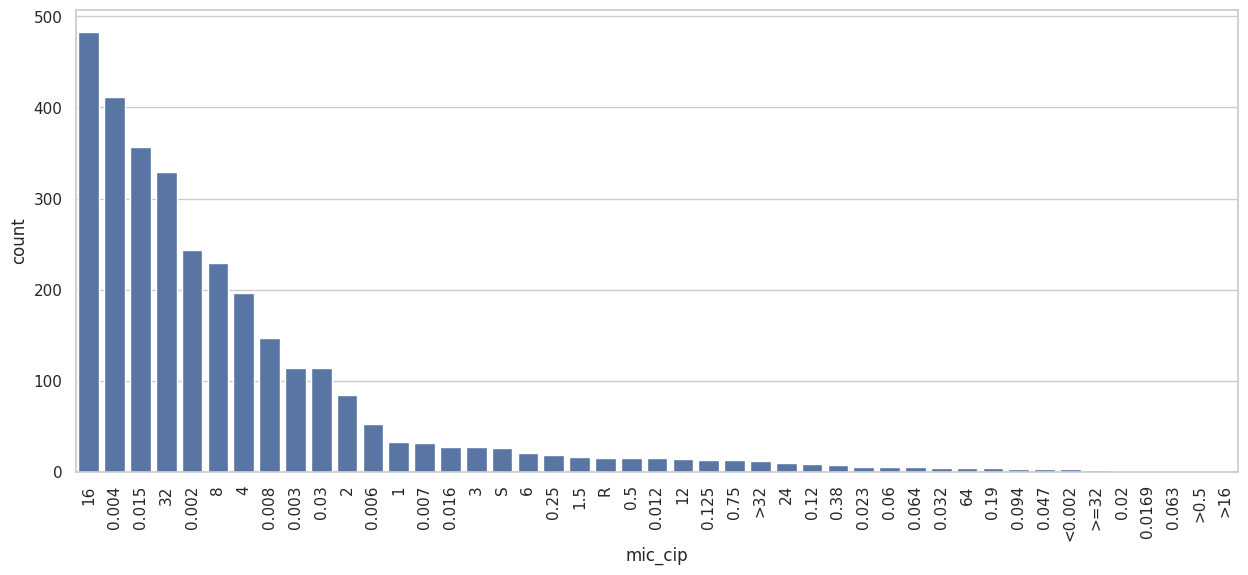

In [ ]:
plt.subplots(figsize=(15, 6))
sns.barplot(mic_cip_df, x='mic_cip', y='count')
plt.xticks(rotation=90)
plt.show()

### Correlation of Unitigs with Resistance
Further information on the chi-square test: https://www.simplilearn.com/tutorials/statistics-tutorial/chi-square-test.

In [ ]:
# Initialize lists
unitigs = []
total_resistant_samples = [] # cip_sr = 1 -> sample is resistant to Ciprofloxacin
total_sensitive_samples = [] # cip_sr = 0 -> sample is sensitive (i.e., not resistant) to Ciprofloxacin
overall_total = []
chi2_val = []

# Iterate over columns and append lists for each unitig
for col in Z.columns[1:-1]: # All columns except index and cip_sr, i.e., all the columns corresponding to unitigs
    unitigs.append(col) # Add the unitig to the list of unitigs
    r_total = Z.loc[Z['cip_sr']==1,col].sum() # How many times does this unitig appear in cases where cip_sr = 1?
    s_total = Z.loc[Z['cip_sr']==0,col].sum() # How many times does this unitig appear in cases where cip_sr = 0?
    all_total = Z[col].sum()

    total_resistant_samples.append(r_total)
    total_sensitive_samples.append(s_total)
    overall_total.append(all_total)

    # We calculate the chi-square value to check the correlation between the unitig and the resistance (or lack thereof) to Ciprofloxacin
    data_crosstab = pd.crosstab(Z['cip_sr'], Z[col], margins=True, margins_name='Total')
    stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
    chi2_val.append(stat)

# create dictionary
cip_unitig_analysis_dict = {
    'unitig': unitigs,
    'total_resistant_samples': total_resistant_samples,
    'total_sensitive_samples': total_sensitive_samples,
    'overall_total': overall_total,
    'chi_square': chi2_val
    }

# convert to dataframe
cip_unitig_analysis = pd.DataFrame(cip_unitig_analysis_dict)
cip_unitig_analysis.head(2)

,unitig,total_resistant_samples,total_sensitive_samples,overall_total,chi_square
0,ACGTTTATGCCGTTATCGATCCGATAGCCGGT,0,0,0,0.0
1,CATCTGCACCCTGTCGGCACTCGCCGCCTGAACCACCCCGTCCGGA...,0,0,0,0.0


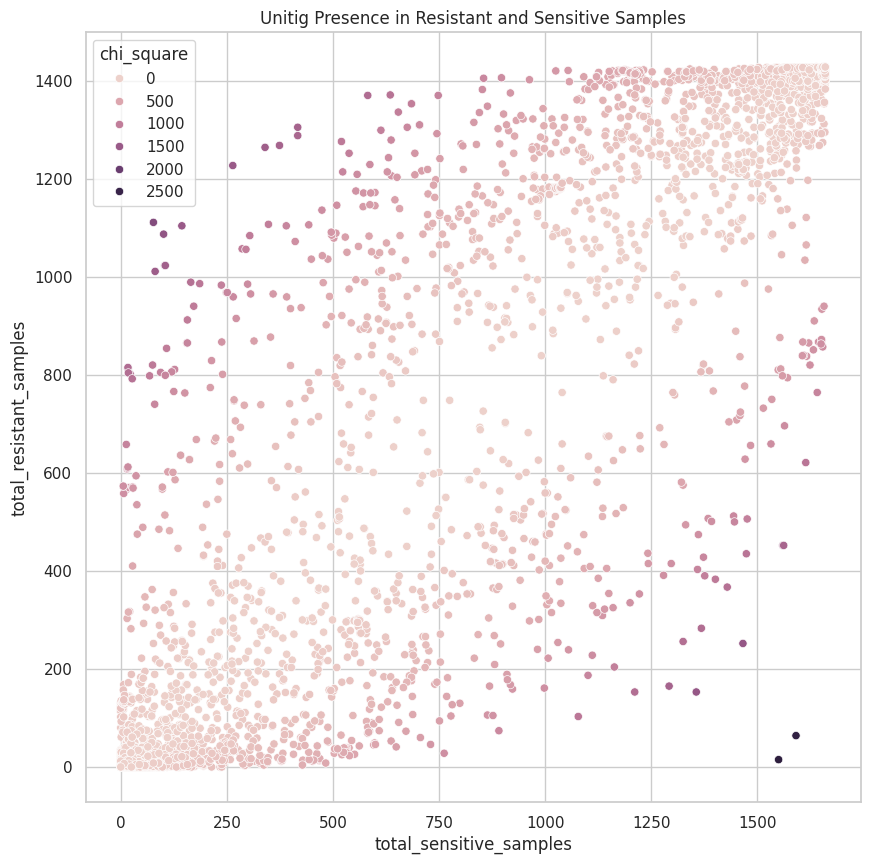

In [ ]:
# plot total_sensitive_samples vs total_resistant_samples
plt.figure(figsize=(10,10))
g = sns.scatterplot(x='total_sensitive_samples', y='total_resistant_samples', hue='chi_square', data=cip_unitig_analysis)
g.set_title('Unitig Presence in Resistant and Sensitive Samples');

We can see that, in general, there is a linear relationship between the number of Ciprofloxacin-resistant samples with a given unitig, and the number of Ciprofloxacin-sensitive samples with the same unitig. This results in a low chi-square value for the majority of unitigs.<br>
Some unitigs appear in a higher number of Ciprofloxacin-resistant samples than Ciprofloxacin-sensitive samples, or vice versa. This results in high chi-square values for these unitigs.

In [ ]:
# Get unitigs with a high chi-square value, sorted by the number of resistant samples (descending).
cip_unitig_analysis[cip_unitig_analysis['chi_square']>1500].sort_values('total_resistant_samples', ascending=False)

,unitig,total_resistant_samples,total_sensitive_samples,overall_total,chi_square
4019,TATACTGCCGTTCAAGTTACCTTTGGTCAGAAAAAA,1227,264,1491,1507.247630
4000,AAATTGCGGATCGATGCGCGAAGGGTCGAATGC,1111,77,1188,1735.886821
3996,GTTGTGCCGAATATTGCACCGATGGAAAGGGGGAGGATGTT,1104,144,1248,1501.716541
3992,CTTGGCACACAGTACCGAACCGGCGGCAATACCGATG,1087,101,1188,1590.697462
4719,GACTACATCAGCGGCAACATCTTGTTTATGCTGACCG,252,1466,1718,1553.077992
4679,CGCACATTTTGGCTTTATCTTTTGGGCGCGCTGACTGCCCGTTTCG...,153,1356,1509,1547.468974
4717,GTGCGACAGCAAAGTCCAAACCAGCGTCCCCGCC,64,1591,1655,2576.301043
5502,GCGCAGCCGCAAATCTTGTTTTCCCATTCCGCC,15,1550,1565,2617.699879


We can see that the following unitigs tend to appear in Ciprofloxacin-resistant samples:
1.   'TATACTGCCGTTCAAGTTACCTTTGGTCAGAAAAAA'
2.   'AAATTGCGGATCGATGCGCGAAGGGTCGAATGC'
3. 'GTTGTGCCGAATATTGCACCGATGGAAAGGGGGAGGATGTT'
4. 'CTTGGCACACAGTACCGAACCGGCGGCAATACCGATG'




# Ciprofloxacin Resistance Models

## Data Preparation
Split into training and test sets

In [ ]:
# Randomly split the data into training and testing sets: 80% training, 20% testing.
# We set the random state to ensure we get the same random split each time we run this line of code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Implementation


### Define metrics

In [ ]:
def get_metrics(y_test, y_predicted):
   accuracy = accuracy_score(y_test, y_predicted)
   precision = precision_score(y_test, y_predicted)
   recall = recall_score(y_test, y_predicted)
   f1 = f1_score(y_test, y_predicted)
   return accuracy, precision, recall, f1

### 1. sklearn - Support Vector Machine (SVM) Classifier Model
Here, we implement an SVM classifier with a linear kernel.<br>
![](https://drive.google.com/uc?id=1EkLpUU-35g1NStPEri9klMt2vvWPu0bU)<br>
Image source: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html

#### Build and Train Model

In [ ]:
# Support Vector Machine (SVM) classifier with linear kernel
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

#### Test and Evaluate Model
- $R^2$ score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
- Mean absolute error (MAE): https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error
- Mean squared error (MSE): https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.960 
precision = 0.957 
recall = 0.953 
f1 = 0.955


### 2. sklearn - Random Forest Classifier Model
<img src="https://drive.google.com/uc?id=1mWEzIMUipEHWQYNgai51IgKCq76nL0dC"  width="60%" height="30%"><br>
Image source: https://medium.com/@denizgunay/random-forest-af5bde5d7e1e

#### Build and Train Model

In [ ]:
# Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

#### Test and Evaluate Model

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.971 
precision = 0.971 
recall = 0.964 
f1 = 0.967


### 3. Keras - Fully-Connected Neural Network
![](https://drive.google.com/uc?id=1C9GiqaBrI0TVI0wv3S7rst052nC-EFzn)<br>
Image source: https://deeplearningmath.org/general-fully-connected-neural-networks

#### Build and Train Model

In [ ]:
# Standardise data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=8, input_dim=X.shape[1], activation='relu')) # Input layer
model.add(keras.layers.Dense(units=4, activation='relu')) # Hidden layer
model.add(keras.layers.Dense(units=1, activation='sigmoid')) # Output layer

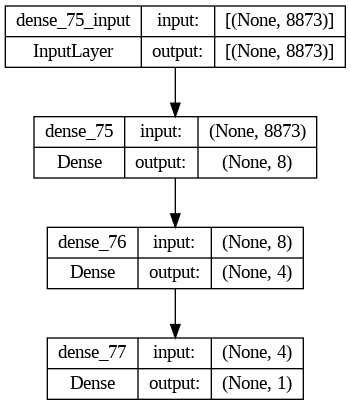

In [ ]:
# Display model
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Compile model
model.compile(optimizer=keras.optimizers.Adam(5e-4),
              loss="binary_crossentropy", # Binary classification -> Use binary cross-entropy loss
              metrics=keras.metrics.Accuracy() # Optimise wrt accuracy
             )

In [ ]:
# Train model
history = model.fit(X_train_scaled, y_train,
          epochs=15,
          batch_size=32,
          verbose=0)

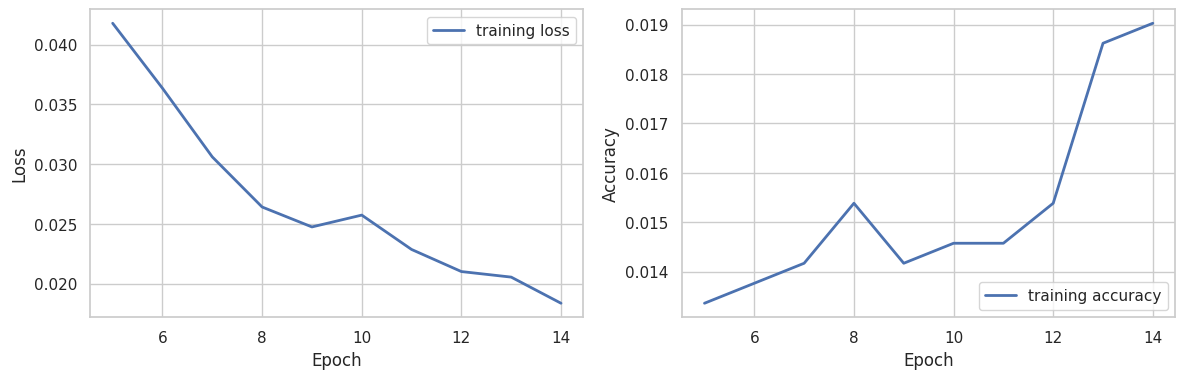

In [ ]:
# Plot loss and accuracy during training
logs = pd.DataFrame(history.history)
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
# plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"accuracy"], lw=2, label='training accuracy')
# plt.plot(logs.loc[5:,"val_accuracy"], lw=2, label='validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

#### Test and Evaluate Model

In [ ]:
y_pred = model.predict(X_test_scaled)

20/20 [==============================] - 0s 3ms/step


In [ ]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.951 
precision = 0.933 
recall = 0.960 
f1 = 0.947


# Try it Yourself: Azithromycin Resistance Models

### Prepare for Azithromycin Data for ML Model Training

In [ ]:
# We will initially look at resistance to Azithromycin
phenotype = 'azm_sr'

# Choose target variable; in this case, resistance to Azithromycin
target = metadata_cip[phenotype]

# Get the feature matrix
feature_matrix = unitigs_azm.transpose()
# Keep only common rows, i.e., those that have the resistance measure
X = feature_matrix[feature_matrix.index.isin(target.index)]
y = target[target.index.isin(feature_matrix.index)]

# # Convert labels to a dataframe
y = pd.DataFrame(y)
y = y.reset_index()
y = y[phenotype]
y = y.astype(int)

# We now have the data X and the labels y

In [ ]:
# Print the top two rows of the data
X.head(2)

In [ ]:
# Print the top two rows of the labels
y.head(2)

### Split data into training and testing sets

In [ ]:
# Randomly split the data into training and testing sets: 80% training, 20% testing.
# We set the random state to ensure we get the same random split each time we run this line of code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Implementation

### 1. sklearn - Support Vector Classifier Model

#### Build and Train Model

In [ ]:
# Support Vector Machine (SVM) Classifier
# TODO: Build an SVM Classifier with a linear kernel
# TODO: Train the SVM Classifier

#### Test and Evaluate Model


In [ ]:
# TODO: Make predictions on the test set

In [ ]:
# TODO: Run the following to get the evaluation metrics
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

### 2. sklearn - Random Forest Classifier Model

#### Build and Train Model

In [ ]:
# Random Forest Classifier
# TODO: Build a Random Forest Classifier model
# TODO: Train the Random Forest Classifier model

#### Test and Evaluate Model

In [ ]:
# TODO: Make predictions on the test set

In [ ]:
# TODO: Run the following to get the evaluation metrics
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

### 3. Keras - Fully-Connected Neural Network

#### Build and Train Model

In [ ]:
# TODO: Run the following to standardise data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# TODO: Build a fully-connected neural network by following these steps
# 1. Initialise a Sequential model with keras
# 2. Add an input layer
# 3. Add a hidden layer
# 4. Add an output layer

In [ ]:
# TODO: Run the following to display the model
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# TODO: Run the following to compile the model
model.compile(optimizer=keras.optimizers.Adam(5e-4),
              loss="binary_crossentropy", # Binary classification -> Use binary cross-entropy loss
              metrics=keras.metrics.Accuracy() # Optimise wrt accuracy
             )

In [ ]:
# TODO: Run the following to train the model
history = model.fit(X_train_scaled, y_train,
          epochs=15,
          batch_size=32,
          verbose=0)

In [ ]:
# TODO: Run the following to plot the loss and accuracy during training
logs = pd.DataFrame(history.history)
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"accuracy"], lw=2, label='training accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

#### Test and Evaluate Model

In [ ]:
# TODO: Make predictions using the trained model

20/20 [==============================] - 0s 3ms/step


In [ ]:
# TODO: Run the following to categorise the predictions > 0.5 as 1, and < 0.5 as 0
y_pred = np.where(y_pred > 0.5, 1, 0)

In [ ]:
# TODO: Run the following to get the evaluation metrics
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))